Número de contornos encontrados = 53
Figura 1:
  - Área: 83.50
  - Perímetro: 72.04
  - Centroide: (70, 220)

Figura 2:
  - Área: 1.50
  - Perímetro: 39.56
  - Centroide: (54, 219)

Figura 3:
  - Área: 15.50
  - Perímetro: 46.38
  - Centroide: (114, 220)

Figura 4:
  - Área: 54.00
  - Perímetro: 41.31
  - Centroide: (38, 219)

Figura 5:
  - Área: 62.50
  - Perímetro: 63.70
  - Centroide: (98, 219)

Figura 6:
  - Área: 2.00
  - Perímetro: 9.66
  - Centroide: (326, 213)

Figura 7:
  - Área: 9.50
  - Perímetro: 44.38
  - Centroide: (323, 202)

Figura 8:
  - Área: 1.50
  - Perímetro: 25.90
  - Centroide: (328, 196)

Figura 9:
  - Área: 0.00
  - Perímetro: 7.66
  - Centroide: (0, 0)

Figura 10:
  - Área: 4.00
  - Perímetro: 34.97
  - Centroide: (324, 194)

Figura 11:
  - Área: 2.00
  - Perímetro: 30.14
  - Centroide: (326, 187)

Figura 12:
  - Área: 0.00
  - Perímetro: 23.31
  - Centroide: (0, 0)

Figura 13:
  - Área: 100.00
  - Perímetro: 166.37
  - Centroide: (181, 195)

Figura 14:
  - Ár

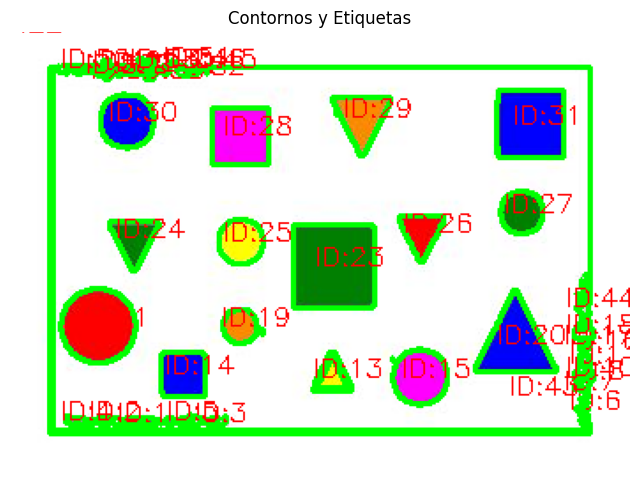

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar imagen en color
image = cv2.imread('image2.png')

# 2. Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Detección de bordes con Canny
edged = cv2.Canny(gray, 30, 200)

# 4. Encontrar contornos en la imagen de bordes
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 5. Crear copia para dibujar contornos
output = image.copy()

# 6. Procesar cada contorno
print("Número de contornos encontrados =", len(contours))
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Dibujar contorno y etiquetar figura con ID
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)
    cv2.putText(output, f"ID:{i+1}", (cx - 10, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    # Imprimir métricas en consola
    print(f"Figura {i+1}:")
    print(f"  - Área: {area:.2f}")
    print(f"  - Perímetro: {perimeter:.2f}")
    print(f"  - Centroide: ({cx}, {cy})\n")

# 7. Mostrar la imagen con matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Contornos y Etiquetas")
plt.axis('off')
plt.show()
